In [366]:
using Causality, IntervalUnionArithmetic

In [421]:
T, N = 1., 50
ρ = 0.
G = Causality.makeGNP(N,ρ)

{50, 0} directed sparse Int64 graph
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [422]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]


getpargen (generic function with 2 methods)

In [423]:
#Initialize generation parameters
ε = 1e-10
λ = 0.6
pseed = 1/2 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)

inf_out = GaussianRate(λ, 4., 3.)

θp = getpar(pseed, autoinf, inf_in);
θpgen = getpargen(pseed, autoinf, inf_out);

In [424]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(3.  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max);

In [425]:
const I = InferentialSI{GaussianRate,GaussianRate,GaussianRate}
const Ig = GenerativeSI{GaussianRate,GaussianRate} 

GenerativeSI{GaussianRate, GaussianRate}

In [426]:
Mp = StochasticModel(Ig, T, θp, G, θpgen);
sample! = Sampler(Mp);

In [430]:
xtrue = zeros(N)
sample!(xtrue)
nobs, p = 50, 1e-6
#O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]
O = [(ti = 1e-2; (i,xtrue[i] < ti ,ti,p)) for i=1:nobs]
[o for o in O if o[2]==1]

25-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (2, 1, 0.01, 1.0e-6)
 (7, 1, 0.01, 1.0e-6)
 (9, 1, 0.01, 1.0e-6)
 (10, 1, 0.01, 1.0e-6)
 (13, 1, 0.01, 1.0e-6)
 (16, 1, 0.01, 1.0e-6)
 (17, 1, 0.01, 1.0e-6)
 (18, 1, 0.01, 1.0e-6)
 (19, 1, 0.01, 1.0e-6)
 (25, 1, 0.01, 1.0e-6)
 (26, 1, 0.01, 1.0e-6)
 (27, 1, 0.01, 1.0e-6)
 (29, 1, 0.01, 1.0e-6)
 (30, 1, 0.01, 1.0e-6)
 (35, 1, 0.01, 1.0e-6)
 (37, 1, 0.01, 1.0e-6)
 (38, 1, 0.01, 1.0e-6)
 (39, 1, 0.01, 1.0e-6)
 (41, 1, 0.01, 1.0e-6)
 (42, 1, 0.01, 1.0e-6)
 (43, 1, 0.01, 1.0e-6)
 (46, 1, 0.01, 1.0e-6)
 (47, 1, 0.01, 1.0e-6)
 (48, 1, 0.01, 1.0e-6)
 (49, 1, 0.01, 1.0e-6)

In [431]:
xtrue

50-element Vector{Float64}:
 1.0
 0.0
 1.0
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 1.0
 1.0
 0.0
 ⋮
 0.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 1.0

In [466]:
#Initialize softened model
T = Float64(T)
ε = 2e-3

inf_out = GaussianRate(0.3, T/2, 6.)
autoinf = GaussianRate(ε, T/2, 1/ε)
pseed=0.9
θp2gen = getpargen(pseed, autoinf, inf_out);

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Ig, T, θp2, G, θp2gen);

In [467]:
#Initialize the parameters to learn

autoinf = GaussianRate(1/N, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)


#θ = getpar(pseed, autoinf, inf_in);
M = StochasticModel(I, T, θ, G, θp2gen);

In [468]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F=descend!(Mp2, O; M=M, numsamples=1000, numiters=1, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.),
         hyperdescender=SignDescender(0.0),learnhyper=1);
F

61.89666020048963

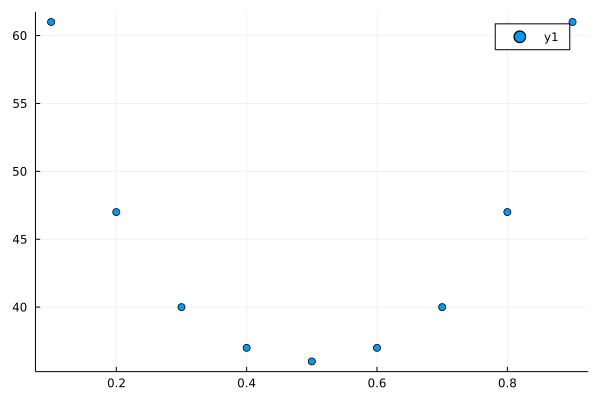

In [474]:
scatter([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],[61,47,40,37,36,37,40,47,61])
#savefig("fe_profile.pdf")

In [438]:
Mp2.θgen

1×7 Matrix{Float64}:
 0.5  1.0e-10  0.5  1.0  0.6  1.0  1.0

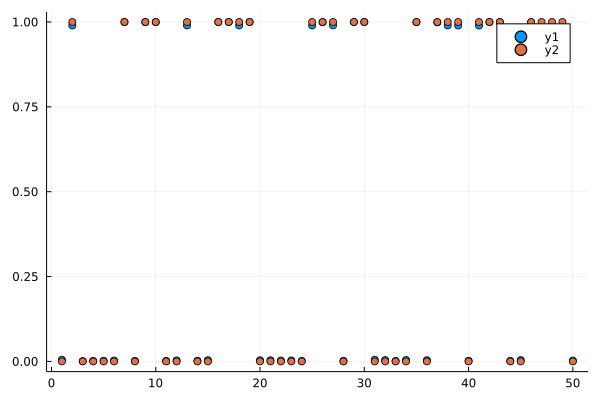

In [439]:
using Plots
scatter(θ[1,:])
scatter!([o[2] for o in O])

In [119]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [57]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:35


In [68]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


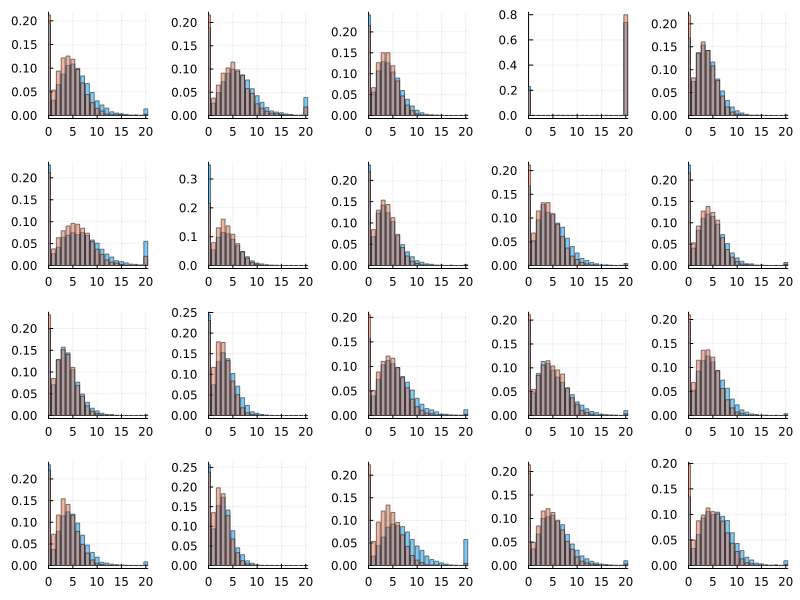

In [69]:
using Plots
state = 1
pl = map(22:41) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
savefig("marginals.pdf")
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [70]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .< stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

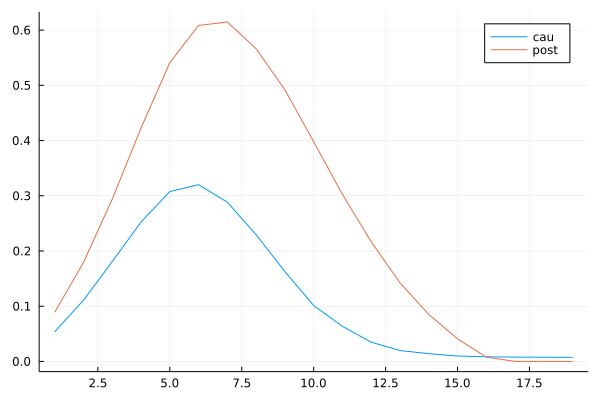

In [71]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 2
plot(p_cau[i,1:end-1], label = "cau")
plot!(p_exact[i,1:end-1], label = "post")

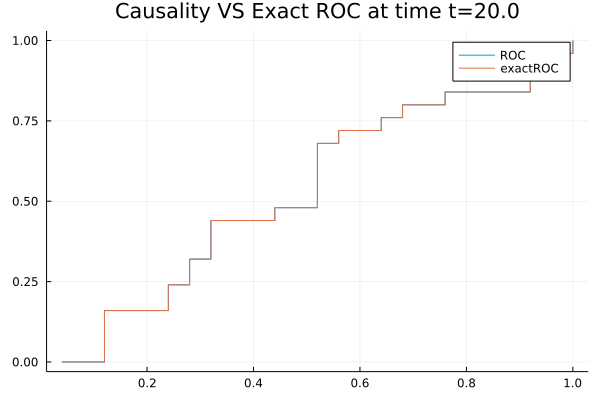

In [72]:
#Let us find the ROC of the infected individuals at time t
t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

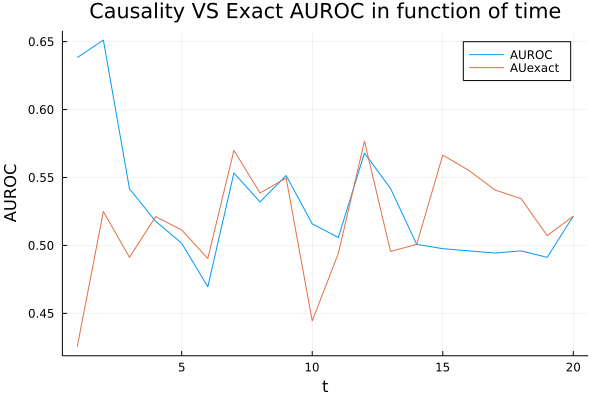

In [73]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")